<a href="https://colab.research.google.com/github/Tomokish/NLP/blob/main/NLP_MID_MODULE_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCK507 NLP MID MODULE PRACTICAL ASSESSMENT.
# Submitted By: Ayeni Oluwakayode
# MSc Artificial Intelligence and Data Science
# Date: March 3, 2025

#TASK (1) First Step: Install all the necessary Libraries

In [ ]:
# Import all the python libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from wordcloud import WordCloud
from gensim.models import KeyedVectors
import spacy
import nltk
import re
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [ ]:
# Check the spaCy library version

In [ ]:
import spacy
print(spacy.__version__)

3.7.5


In [ ]:
# Download the English Language Model

In [ ]:
nlp = spacy.load("en_core_web_sm")
print(nlp("Welcome"))

Welcome


In [ ]:
# Download NLTK Data

In [ ]:
nltk.download ('punkt_tab') # one challenge encountered
nltk.download ('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#TASK (2): Perform Data Analysis

In [ ]:
# Next is to Load the Dataset

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
# Display the information of the dataset and read first 5 lines

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ... 

In [ ]:
# Check for Missing Values

In [ ]:
print(df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


Good output result. It shows no missing values in the datasets.

In [ ]:
# Check and Analyse the Class Distribution

In [ ]:
class_counts = df.iloc[:, 2:].sum()
print(class_counts)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


In [ ]:
# Plot the Class Distribution

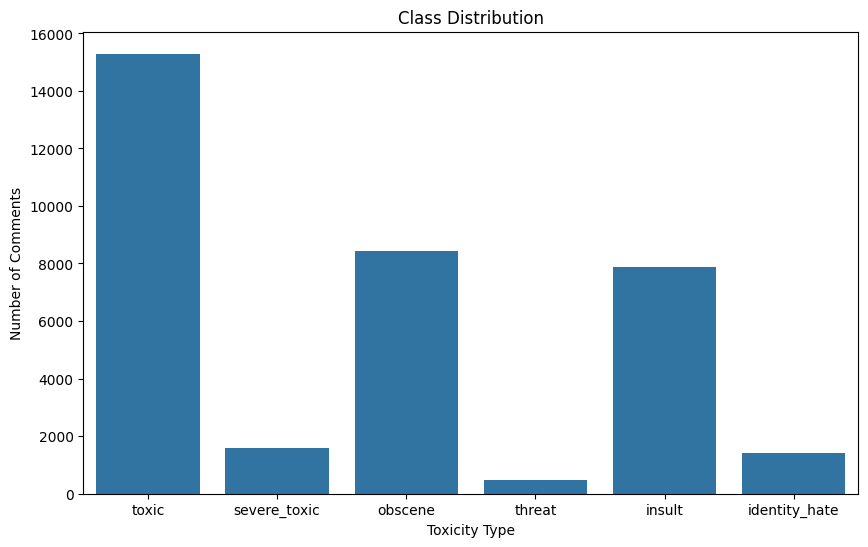

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Toxicity Type')
plt.ylabel('Number of Comments')
plt.show()


#TASK (3): Text Preprocessing Stages

In [ ]:
# Preprocess the text

In [ ]:
def preprocess_text(text): # text preprocess function
  text=text.lower() # Convert text into lower cases
  text = re.sub(r'http\S+|www\S+|https\S+','',text, flags=re.MULTILINE) # Remove urls
  text = re.sub(r'<.*?','',text) # Remove HTML tags
  text = re.sub(r'[a-z\s]', '',text) # Remove punctuations and numbers

In [ ]:
# Tokenisation - We begins by analysing the number of tokens per class

In [ ]:
def count_tokens(text):
  tokens=word_tokenize(text)
  return len(tokens)

In [ ]:
df['token_count'] = df['comment_text'].apply(count_tokens)

In [ ]:
# Plot the Distribution of the Tokens Count

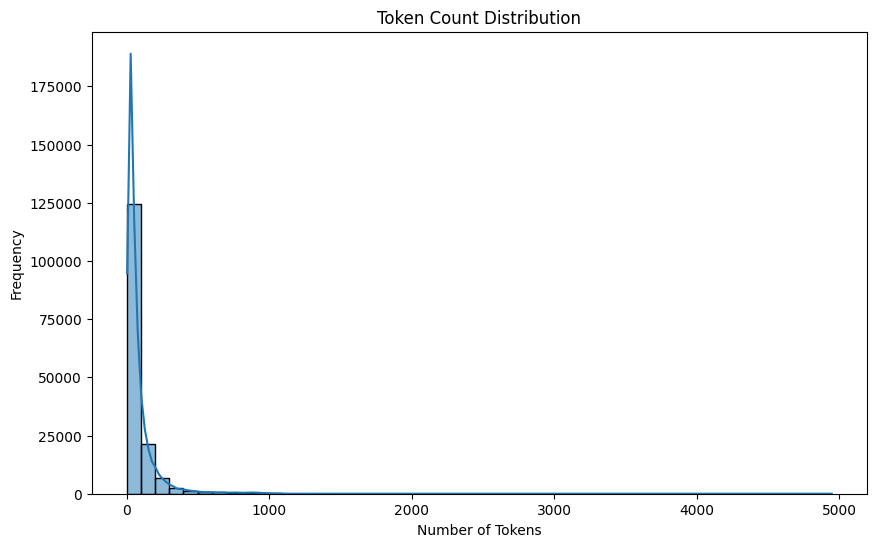

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['token_count'], bins=50, kde=True)
plt.title('Token Count Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()



#EDA: We Analyse the Most Common Words For Each Class

In [ ]:
stop_words = list(stopwords.words('english')) # Another Challenge list instead of set
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=10000)

In [ ]:
def get_top_n_words(corpus, n=None):
  vec =TfidfVectorizer(stop_words=stop_words).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted (words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

for label in class_counts.index:
  subset = df[df[label] == 1]
  top_words = get_top_n_words(subset['comment_text'], 20)
  print(f"Top words for {label}:")
  print(top_words)
  print("\n")

Top words for toxic:
[('fuck', 465.74310911074923), ('fucking', 281.9145050378826), ('wikipedia', 234.52616423799776), ('like', 233.1396313706111), ('go', 225.26193214724975), ('get', 214.5677293842827), ('shit', 206.9035444447101), ('page', 201.3587466219367), ('stop', 173.7222705584454), ('bitch', 168.2213586146765), ('suck', 165.68010009803476), ('ass', 159.64120549351728), ('know', 159.47414435176805), ('stupid', 157.32612097559428), ('people', 151.75892874650114), ('talk', 142.8518089030154), ('asshole', 134.4717087210417), ('one', 133.01586966428516), ('gay', 132.81889771423275), ('article', 128.7196381311671)]


Top words for severe_toxic:
[('fuck', 128.60389605989414), ('fucking', 67.88512383054223), ('bitch', 51.17555739926028), ('go', 47.4337295638837), ('suck', 45.04493069566781), ('shit', 44.17897413721081), ('ass', 37.386111130994266), ('asshole', 35.19725409065157), ('dick', 33.16268774521794), ('cunt', 31.631292851321273), ('faggot', 30.81650054281765), ('get', 26.889403

In [ ]:
# We next Preprocess the Data

In [ ]:
def preprocess_text(text):
  tokens = word_tokenize(text.lower()) # tokenize
  tokens = [word for word in tokens if word.isalpha() and word not in stop_words]# remove stop words
  return ''.join(tokens)

In [ ]:
df['cleaned_comment'] = df['comment_text'].apply(preprocess_text)

In [ ]:
# We define the features and target variables

In [ ]:
x = df['comment_text']
y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
# We Split the Data into Training and Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#TASK (4): Following Next is to Perform Features Extraction of the model Using TF-IDF Method

In [ ]:
# Initialize TF-IDF Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range= (1, 2))

In [ ]:
# Fit and Transform the Training Data

In [ ]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

In [ ]:
# Fit and Transform the Test Data

In [ ]:
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [ ]:
# Display the shape of the TF-IDF

In [ ]:
print(f"TF-IDF Training Data Shape: {x_train_tfidf.shape}")
print(f"TF-IDF Testing Data Shape: {x_test_tfidf.shape}")

TF-IDF Training Data Shape: (127656, 10000)
TF-IDF Testing Data Shape: (31915, 10000)


#TASK (5) Select Three Different Machine Learning Algorithms.
# Logistic Regression , Random Forest and  K-Nearest Neighbors

In [ ]:
# Next is to initialize and define the model

In [ ]:
# Define the three Classifiers

In [ ]:
classifiers = {
   'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5) # for 5 numbers of neighbors
}

In [ ]:
# We define Functions to Evaluate the Model Performance

In [ ]:
# Evaluate the Models

In [ ]:
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)

    # Initialize an empty dictionary for storing the metrics
    metrics_dict = {}

    print(f"Results for {name}:")

    # Iterate through each column

    for i, column in enumerate(y_test.columns):
      print (f"Evaluating category: {column}")

      # Calculate and store metric for each categories
      accuracy = accuracy_score(y_test[column], y_pred[:, i])
      precision = precision_score(y_test[column], y_pred[:, i])
      recall = recall_score(y_test[column], y_pred[:, i])
      f1 = f1_score(y_test[column],y_pred[:, i])
      auc = roc_auc_score(y_test[column], y_pred[:, i])

      metrics_dict[column] = {
          'accuracy': accuracy,
          'precision': precision,
          'recall': recall,
          'f1': f1,
          'auc': auc
      }

      # Print the result for each category
      print(f"Accuracy: {accuracy:.4f}")
      print(f"Precision: {precision:.4f}")
      print(f"Recall: {recall:.4f}")
      print(f"F1 Score: {f1:.4f}")
      print(f"AUC: {auc:.4f}")
      print("-" * 80)

    return metrics_dict #return the dictionary for each label

In [ ]:
# Model Training and Evaluation

In [ ]:
# Dictionary to store the result of each model

In [ ]:
results_tfidf = {}

In [ ]:
for name, clf in classifiers.items():
  multi_target_clf = MultiOutputClassifier(clf, n_jobs=1)
  multi_target_clf.fit(x_train_tfidf, y_train)

  print(f"Evaluating {name} on TF-IDF Features...")

  results_tfidf[name] = evaluate_model(name, multi_target_clf, x_test_tfidf, y_test) # Store the Result

Evaluating Logistic Regression on TF-IDF Features...
Results for Logistic Regression:
Evaluating category: toxic
Accuracy: 0.9567
Precision: 0.9082
Recall: 0.6090
F1 Score: 0.7291
AUC: 0.8012
--------------------------------------------------------------------------------
Evaluating category: severe_toxic
Accuracy: 0.9907
Precision: 0.5968
Recall: 0.2305
F1 Score: 0.3326
AUC: 0.6145
--------------------------------------------------------------------------------
Evaluating category: obscene
Accuracy: 0.9759
Precision: 0.9164
Recall: 0.6076
F1 Score: 0.7307
AUC: 0.8022
--------------------------------------------------------------------------------
Evaluating category: threat
Accuracy: 0.9976
Precision: 0.3750
Recall: 0.0811
F1 Score: 0.1333
AUC: 0.5404
--------------------------------------------------------------------------------
Evaluating category: insult
Accuracy: 0.9706
Precision: 0.8451
Recall: 0.5136
F1 Score: 0.6389
AUC: 0.7543
-------------------------------------------------



#TASK (6): To Perform Feature Extraction of the Model Using Word Embedding Method

In [ ]:
# Load Pre-trained Word Embedddings to Enhance the training and performance
# Load pre-trained word2vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
word2vec_path = "/content/drive/My Drive/word2vec/GoogleNews-vectors-negative300.bin"
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
# Define a Function to convert comments into Embedding Mean or Average

In [ ]:
def comment_to_vec(comment, word2vec, vector_size=300):
  #words = word_tokenize(comment.lower())
  words = comment.split()
  word_vectors = [word2vec[word] for word in words if word in word2vec]
  if len(word_vectors) == 0:
    return np.zeros(vector_size)
  return np.mean(word_vectors, axis=0)

In [ ]:
# Transform Comments into the Embedding Features

In [ ]:
x_train_embedded = np.array([comment_to_vec(comment, word2vec) for comment in x_train])
x_test_embedded = np.array([comment_to_vec(comment, word2vec) for comment in x_test])

In [ ]:
# Setting Parameters

In [ ]:
MAX_NUM_WORDS = 10000 # For the size of the vocabulary
MAX_SEQUENCE_LENGTH = 100 # Max length for input sequences

In [ ]:
# Tokenize the text

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(x_train)

In [ ]:
# Convert the text to Sequences

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Ensure Uniform Input Sizes by Padding the Sequences

In [ ]:
x_train_pad = pad_sequences(x_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
x_test_pad = pad_sequences(x_test_seq, maxlen=MAX_SEQUENCE_LENGTH )

In [ ]:
# Define Function to Evaluate the Model Performance

In [ ]:
def evaluate_model( model, x_test, y_test):
  y_pred = model.predict(x_test)
  metrics = {}
  for i, label in enumerate(y_test.columns):

    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    precision = precision_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0)
    recall = recall_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0)
    f1 = f1_score(y_test.iloc[:, i], y_pred[:, i], zero_division=0)
    auc= roc_auc_score(y_test.iloc[:, i], y_pred[:, i])
    metrics[label] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    }
  return metrics

In [ ]:
# Next is to Initialize the Classifiers

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=1),
    'K-Nearest Neighbors': KNeighborsClassifier(n_jobs=1)
}

In [ ]:
# Store the Result

In [ ]:
results_embedded = {} # For Storing Word Embeding Results

In [ ]:
# Then Train and Evaluate Each of the Classifiers

In [ ]:
for name, classifier in classifiers.items():
  print(f"Training {name}...")
  start_time = time.time()
  model = MultiOutputClassifier(classifier, n_jobs=1)

  #Train the model Using Word Embedding
  model.fit(x_train_embedded, y_train)
  end_time = time.time()
  print(f"Training time: {end_time - start_time:.2f} seconds")

  print(f"Evaluating {name} on Word Embedding Features...")
  metrics = evaluate_model(model, x_test_embedded, y_test)
  results_embedded[name] = metrics # Store the result

  for label, scores in metrics.items():
    print(f"Label: {label}")
    print(f" Accuracy: {scores['accuracy']:.4f}")
    print(f" Precision: {scores['precision']:.4f}")
    print(f" Recall: {scores['recall']:.4f}")
    print(f" F1 Score: {scores['f1_score']:.4f}")
    print(f" AUC: {scores['auc']:.4f}")
    print("-" * 50)

Training Logistic Regression...
Training time: 11.84 seconds
Evaluating Logistic Regression on Word Embedding Features...
Label: toxic
 Accuracy: 0.9339
 Precision: 0.7595
 Recall: 0.4526
 F1 Score: 0.5672
 AUC: 0.7187
--------------------------------------------------
Label: severe_toxic
 Accuracy: 0.9897
 Precision: 0.4615
 Recall: 0.1682
 F1 Score: 0.2466
 AUC: 0.5831
--------------------------------------------------
Label: obscene
 Accuracy: 0.9613
 Precision: 0.7545
 Recall: 0.4157
 F1 Score: 0.5361
 AUC: 0.7040
--------------------------------------------------
Label: threat
 Accuracy: 0.9976
 Precision: 0.3571
 Recall: 0.0676
 F1 Score: 0.1136
 AUC: 0.5336
--------------------------------------------------
Label: insult
 Accuracy: 0.9585
 Precision: 0.6850
 Recall: 0.3315
 F1 Score: 0.4468
 AUC: 0.6617
--------------------------------------------------
Label: identity_hate
 Accuracy: 0.9904
 Precision: 0.3818
 Recall: 0.0714
 F1 Score: 0.1203
 AUC: 0.5352
----------------------

#TASK (7): We Visualize the Metrics for Comparison

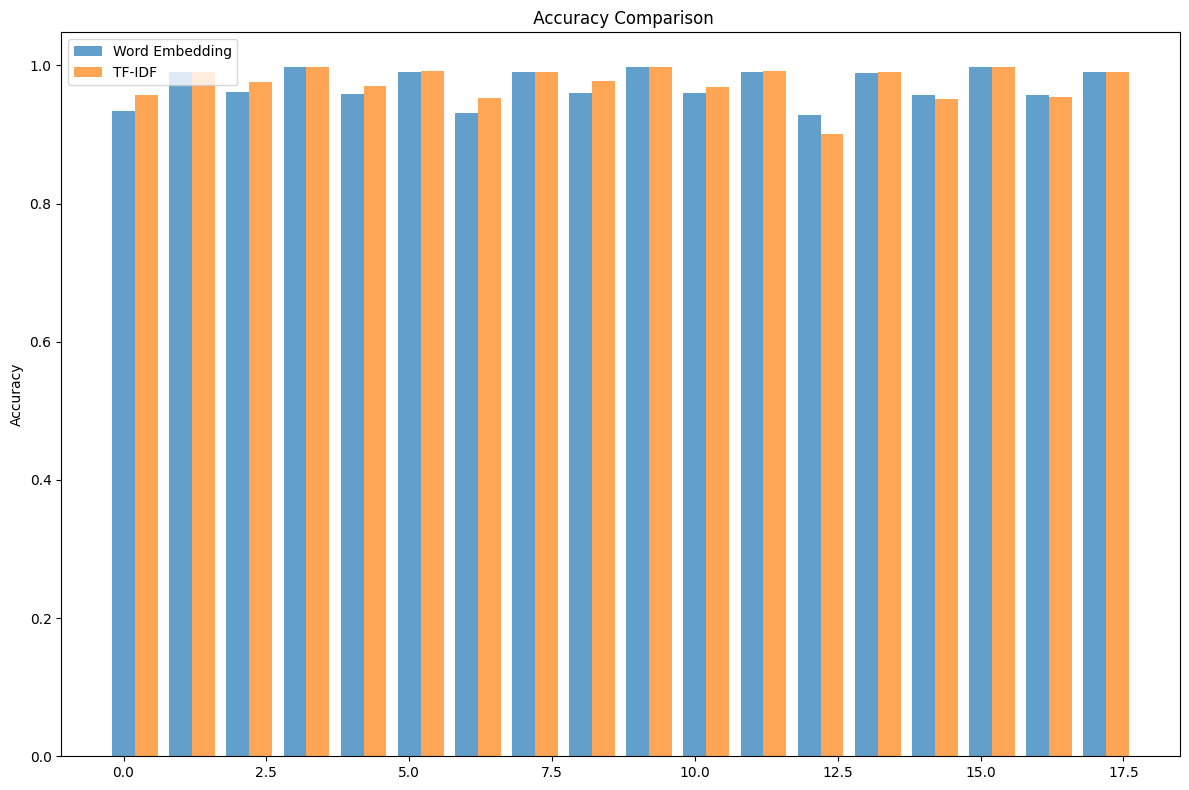

In [ ]:
metric_name = 'accuracy'
plt.figure(figsize=(12, 8))


  # For TF-IDF (results_tfidf)
accuracy_values_tfidf = [
      metric_scores.get(metric_name, None)

      for model_name in results_tfidf
      for label, metric_scores in results_tfidf[model_name].items()
  ]

  # For Word Ebbedding (results_embedded)
accuracy_values_we = [
      metric_scores.get(metric_name, None)

      for model_name in results_embedded
      for label, metric_scores in results_embedded[model_name].items()
  ]


if len(accuracy_values_we) == len(accuracy_values_tfidf):
     index = np.arange(len(accuracy_values_we))

     bar_width = 0.4

     plt.bar(index, accuracy_values_we, bar_width, label='Word Embedding', alpha=0.7)
     plt.bar(index + bar_width, accuracy_values_tfidf, bar_width, label='TF-IDF', alpha=0.7)


     model_names = list(results_embedded.keys())[:len(index)]


     plt.title(f" Accuracy Comparison")
     plt.ylabel('Accuracy')
     plt.legend()


else:
    print(f"Error: Lengths of accuracy values do not match. Check data alignment. TF-IDF has:{len(accuracy_values_tfidf)}, Word Wmbedding has:{len(accuracy_values_we)}")

plt.tight_layout()
plt.show()

In [ ]:
for key, value in results_embedded.items():
  print(f"key:{key}, value:{value}")

key:Logistic Regression, value:{'toxic': {'accuracy': 0.9338555538148207, 'precision': 0.7594728171334432, 'recall': 0.4525523560209424, 'f1_score': 0.5671519376665983, 'auc': 0.7186875574761491}, 'severe_toxic': {'accuracy': 0.9896600344665518, 'precision': 0.46153846153846156, 'recall': 0.16822429906542055, 'f1_score': 0.2465753424657534, 'auc': 0.5831151247811751}, 'obscene': {'accuracy': 0.9613347955506815, 'precision': 0.7544973544973544, 'recall': 0.4157434402332362, 'f1_score': 0.5360902255639097, 'auc': 0.704030660513969}, 'threat': {'accuracy': 0.9975560081466395, 'precision': 0.35714285714285715, 'recall': 0.06756756756756757, 'f1_score': 0.11363636363636363, 'auc': 0.5336424565641613}, 'insult': {'accuracy': 0.958483471721761, 'precision': 0.6850192061459667, 'recall': 0.33147459727385375, 'f1_score': 0.44676409185803756, 'auc': 0.6616780266657049}, 'identity_hate': {'accuracy': 0.9903806987310042, 'precision': 0.38181818181818183, 'recall': 0.07142857142857142, 'f1_score': 

#Visualise the Accuracy, F1 Score and AUC

In [ ]:
# Define the Metric to Plot

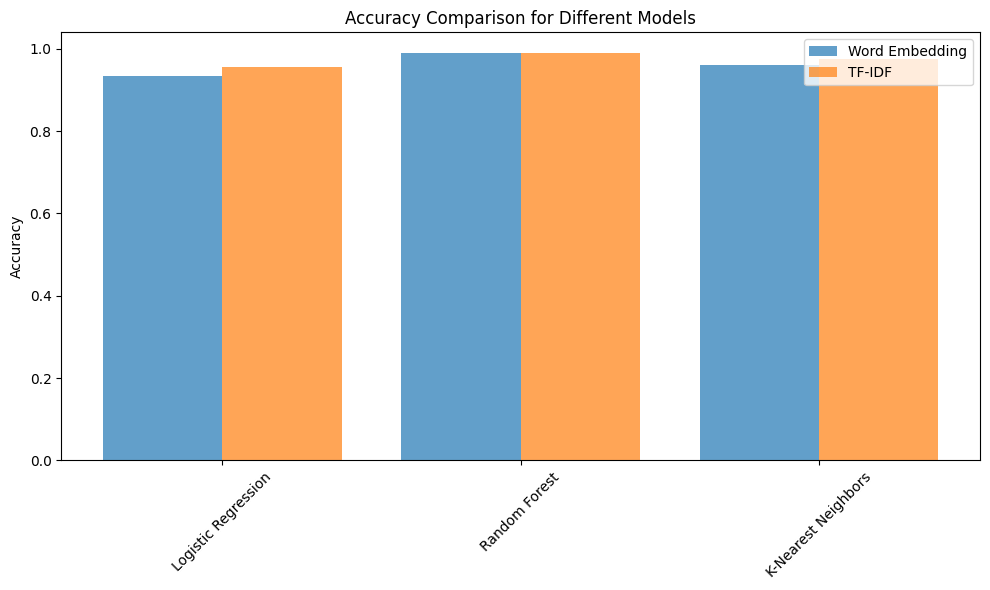

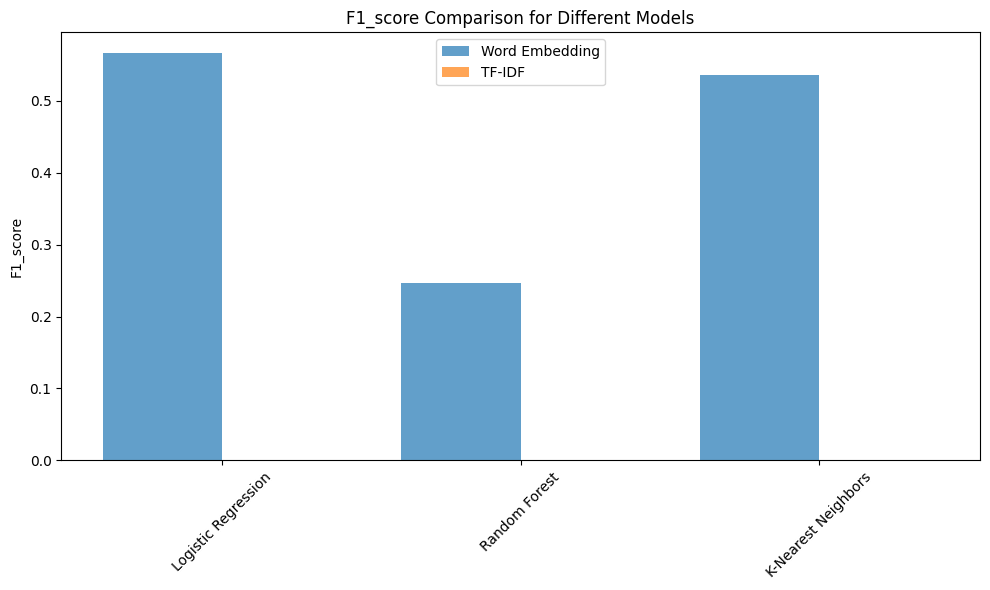

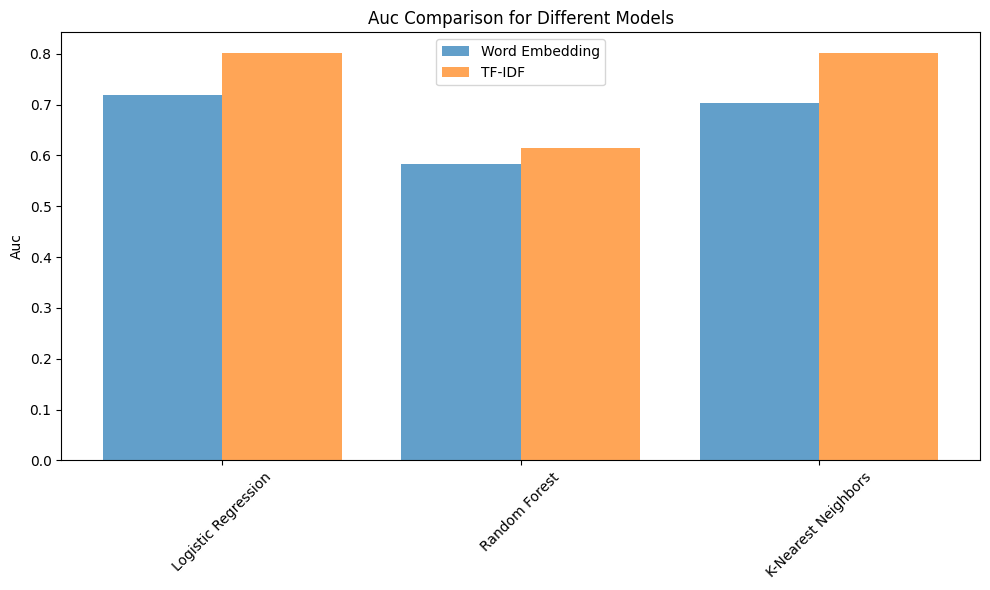

In [ ]:
metrics_to_plot = ['accuracy', 'f1_score', 'auc']

#Get the list of Model Nmaes to Plot
model_names = list(results_embedded.keys())

for metric_name in metrics_to_plot:
  plt.figure(figsize=(10, 6))

  #Extract Values for Each Model to Plot Using TF-IDF
  metric_values_tfidf = [
      metric_scores.get(metric_name, 0)
      for model_name in model_names
      for label, metric_scores in results_tfidf[model_name].items()
  ]

  #Extract Values for Each Model to Plot Using Word Embedding
  metric_values_we = [
      metric_scores.get(metric_name, 0) # Default to 0 if metric is not found
      for model_name in model_names
      for label, metric_scores in results_embedded[model_name].items()
  ]

  # Check if Data is Available to Plot
  if len(metric_values_we) == len(metric_values_tfidf):
    index = np.arange(len(model_names))
    bar_width = 0.4

    plt.bar(index, metric_values_we[:len(index)], bar_width, label='Word Embedding', alpha=0.7)
    plt.bar(index + bar_width, metric_values_tfidf[:len(index)], bar_width, label='TF-IDF', alpha=0.7 )

    model_names = list(results_embedded.keys())[:len(index)]

    plt.xticks(index + bar_width / 2, model_names, rotation=45)
    plt.title(f"{metric_name.capitalize()} Comparison for Different Models")
    plt.ylabel(metric_name.capitalize())
    plt.legend()

    plt.tight_layout()
    plt.show()

  else:
    print(f"Error: Lengths of {metric_name} values do not match. TF-IDF has: {len(metric_values_tfidf)}, Word Embedding has: {len(metric_values_we)}")

#TASK (8): Prepare Model Ready For Submission to Kaggle Competition

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
print(test_data.head())

                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


In [ ]:
# Print Test Data Columns

In [ ]:
print(test_data.columns)

Index(['id', 'comment_text'], dtype='object')


In [ ]:
# Apply TF-IDF and Word Embedding to Test Data

In [ ]:
x_test_tfidf = tfidf_vectorizer.transform(test_data['comment_text'])
print(f"Length of x_test_tfidf: {x_test_tfidf.shape[0]}")

Length of x_test_tfidf: 153164


In [ ]:
# Print Training and Test Data Features

In [ ]:
print(f"Training Data Features: {x_train_tfidf.shape[1]}")
print(f"Test Data Features: {x_test_tfidf.shape[1]}")

Training Data Features: 10000
Test Data Features: 10000


In [ ]:
# Train Your Model

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
# Make Predicting Using the Transformed Data

In [ ]:
predictions = model.predict(x_test_tfidf)

In [ ]:
# Print the length of predictions

In [ ]:
print(f"Length of Predictions: {len(predictions)}")

Length of Predictions: 153164


In [ ]:
# Print the length of the Data

In [ ]:
print(f"Length of test_data ['id]: {len(test_data['id'])}")
print(f"Length of Predictions: {len(predictions)}")
print(f"Length of x_test_tfidf:{x_test_tfidf.shape[0]}")

Length of test_data ['id]: 153164
Length of Predictions: 153164
Length of x_test_tfidf:153164


In [ ]:
print(predictions.shape)

(153164, 6)


In [ ]:
# Prepare the Submission DataFrame

In [ ]:
submission = pd.DataFrame(predictions, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
submission.insert(0, 'id', test_data['id']) # This add 'id' as the first column

print(submission.head()) # This will verify the submission Format Used.

                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12      0             0        0       0       0   
1  0000247867823ef7      0             0        0       0       0   
2  00013b17ad220c46      0             0        0       0       0   
3  00017563c3f7919a      0             0        0       0       0   
4  00017695ad8997eb      0             0        0       0       0   

   identity_hate  
0              0  
1              0  
2              0  
3              0  
4              0  


In [ ]:
# Save the Submission File as CSV

In [ ]:
submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)
print(f"Submission file '{submission_file} is ready for upload to Kaggle")

Submission file 'submission.csv is ready for upload to Kaggle


In [ ]:
# To Download the CSV Submission File.

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>